# Maximum CDM values plotted against synaptic firing rates in the alternative model

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import LFPy
import synaptic_properties as sp
from lfpykit.models import CurrentDipoleMoment
from brainsignals.plotting_convention import simplify_axes, mark_subplots
from brainsignals import neural_simulations as ns

from elephant.spike_train_generation import inhomogeneous_poisson_process
from quantities import Hz, ms
import neo

### Define parameters

In [2]:
np.random.seed(123)
dt = 2**-4
tstop = 400
num_tsteps = int(tstop / dt) + 1
tvec = np.arange(num_tsteps) * dt
freq = 20 # Hz



### Simulate alternative neuron

In [3]:
cell = ns.return_hay_cell(tstop, dt, make_passive=False)
synidxs_bot_ex = cell.get_rand_idx_area_norm(z_min=-1e9, z_max=300, nidx=50)
synidxs_top_ex = cell.get_rand_idx_area_norm(z_min=900, z_max=1200, nidx=50)
synidxs_bot_in = cell.get_rand_idx_area_norm(z_min=-1e9, z_max=300, nidx=50)
synidxs_top_in = cell.get_rand_idx_area_norm(z_min=900, z_max=1200, nidx=50)
del cell

def pz_amp(avrg_rate, i=None):
    # Synaptic rateprofiles
    syn_rate_0 = sp.syn_rate(tvec, dt, freq, avrg_rate, phase=0)
    syn_rate_pi = sp.syn_rate(tvec, dt, freq, avrg_rate, phase=np.pi)
    
    cell = ns.return_hay_cell(tstop, dt, make_passive=False)
    
    # Define synapse parameters
    synapse_params_ex = sp.synapse_params(0)
    synapse_params_in = sp.synapse_params(-90)

    # Simultaneous input top
    # Exitatory
    for synidx in synidxs_top_ex:
        synapse_params_ex["idx"] = synidx
        synapse = LFPy.Synapse(cell, **synapse_params_ex)
        spiketimes_rate = inhomogeneous_poisson_process(syn_rate_0 * 1.2)
        synapse.set_spike_times(np.array(spiketimes_rate)*1000)
    # Inhibitory
    for synidx in synidxs_top_in:
        synapse_params_in["idx"] = synidx
        synapse = LFPy.Synapse(cell, **synapse_params_in)
        spiketimes_rate = inhomogeneous_poisson_process(syn_rate_pi * 1.2)
        synapse.set_spike_times(np.array(spiketimes_rate)*1000)
    
    # Define synapse parameters
    synapse_params_ex = sp.synapse_params(0)
    synapse_params_in = sp.synapse_params(-90)
    
    # Simultaneous input bot
    # Exitatory
    for synidx in synidxs_bot_ex:
        synapse_params_ex["idx"] = synidx
        synapse = LFPy.Synapse(cell, **synapse_params_ex)
        spiketimes_rate = inhomogeneous_poisson_process(syn_rate_pi * 1.2)
        synapse.set_spike_times(np.array(spiketimes_rate)*1000)
    # Inhibitory
    for synidx in synidxs_bot_in:
        synapse_params_in["idx"] = synidx
        synapse = LFPy.Synapse(cell, **synapse_params_in)
        spiketimes_rate = inhomogeneous_poisson_process(syn_rate_0 * 1.2)
        synapse.set_spike_times(np.array(spiketimes_rate)*1000)

    cell.simulate(rec_imem=True, rec_vmem=True)
    cdms = CurrentDipoleMoment(cell).get_transformation_matrix() @ cell.imem

    cdms_FT = cdms[2, tvec>100]
    tvec_FT = tvec[tvec>100]

    cdms_freq, cdms_amp = sp.amp_FT(tvec_FT, cdms_FT, freq)

    if i is not None:
        cm=1/2.54
        fig = plt.figure(figsize=(12*cm, 8*cm))
        fig.subplots_adjust(bottom=0.1, top=0.9, right=0.95, left=0.15, 
                            wspace=0.3, hspace=0.3,)
        cdm_act = fig.add_subplot(211, title=f'average rate: {avrg_rate}Hz\n', xlabel='time (ms)')
        mp_act = fig.add_subplot(212, xlabel='time (ms)')
        
        cdm_act.plot(tvec, cdms, label='current dipole moment (nA µm)', c='mediumpurple')
        cdm_act.legend()
        
        mp_act.plot(tvec, cell.vmem[0, -len(tvec):], label='membrane potential (mV)', c='mediumaquamarine')
        mp_act.legend()
        
        simplify_axes(fig.axes)
        mark_subplots([cdm_act, mp_act], "AB")
        
        plt.savefig(f'figures_active_cells_alternating/mp_cdm_individual_plot_1_{i+1}_1.pdf')
        plt.close("all")
    
    del cell
    del synapse
    
    return cdms_amp

**Plot amplitude as a function of rate**

In [4]:
avrg_rate = np.arange(0, 1050, 50)
amp = [pz_amp(rate) for rate in avrg_rate]

Changing temperature 34.00 to 34.00
20.0 0.009740888969844229
Changing temperature 34.00 to 34.00
20.0 73.80553480271469
Changing temperature 34.00 to 34.00
20.0 129.84517879447105
Changing temperature 34.00 to 34.00
20.0 154.83665044420704
Changing temperature 34.00 to 34.00
20.0 170.9252619859224
Changing temperature 34.00 to 34.00
20.0 180.61452977121908
Changing temperature 34.00 to 34.00
20.0 185.80596810646983
Changing temperature 34.00 to 34.00
20.0 188.43548594752298
Changing temperature 34.00 to 34.00
20.0 191.10934019687167
Changing temperature 34.00 to 34.00
20.0 193.17261091786588
Changing temperature 34.00 to 34.00
20.0 193.56988765505454
Changing temperature 34.00 to 34.00
20.0 190.81236259776466
Changing temperature 34.00 to 34.00
20.0 196.7969900521837
Changing temperature 34.00 to 34.00
20.0 195.3287566740059
Changing temperature 34.00 to 34.00
20.0 193.6549849440613
Changing temperature 34.00 to 34.00
20.0 192.42483535579592
Changing temperature 34.00 to 34.00
20.0 19

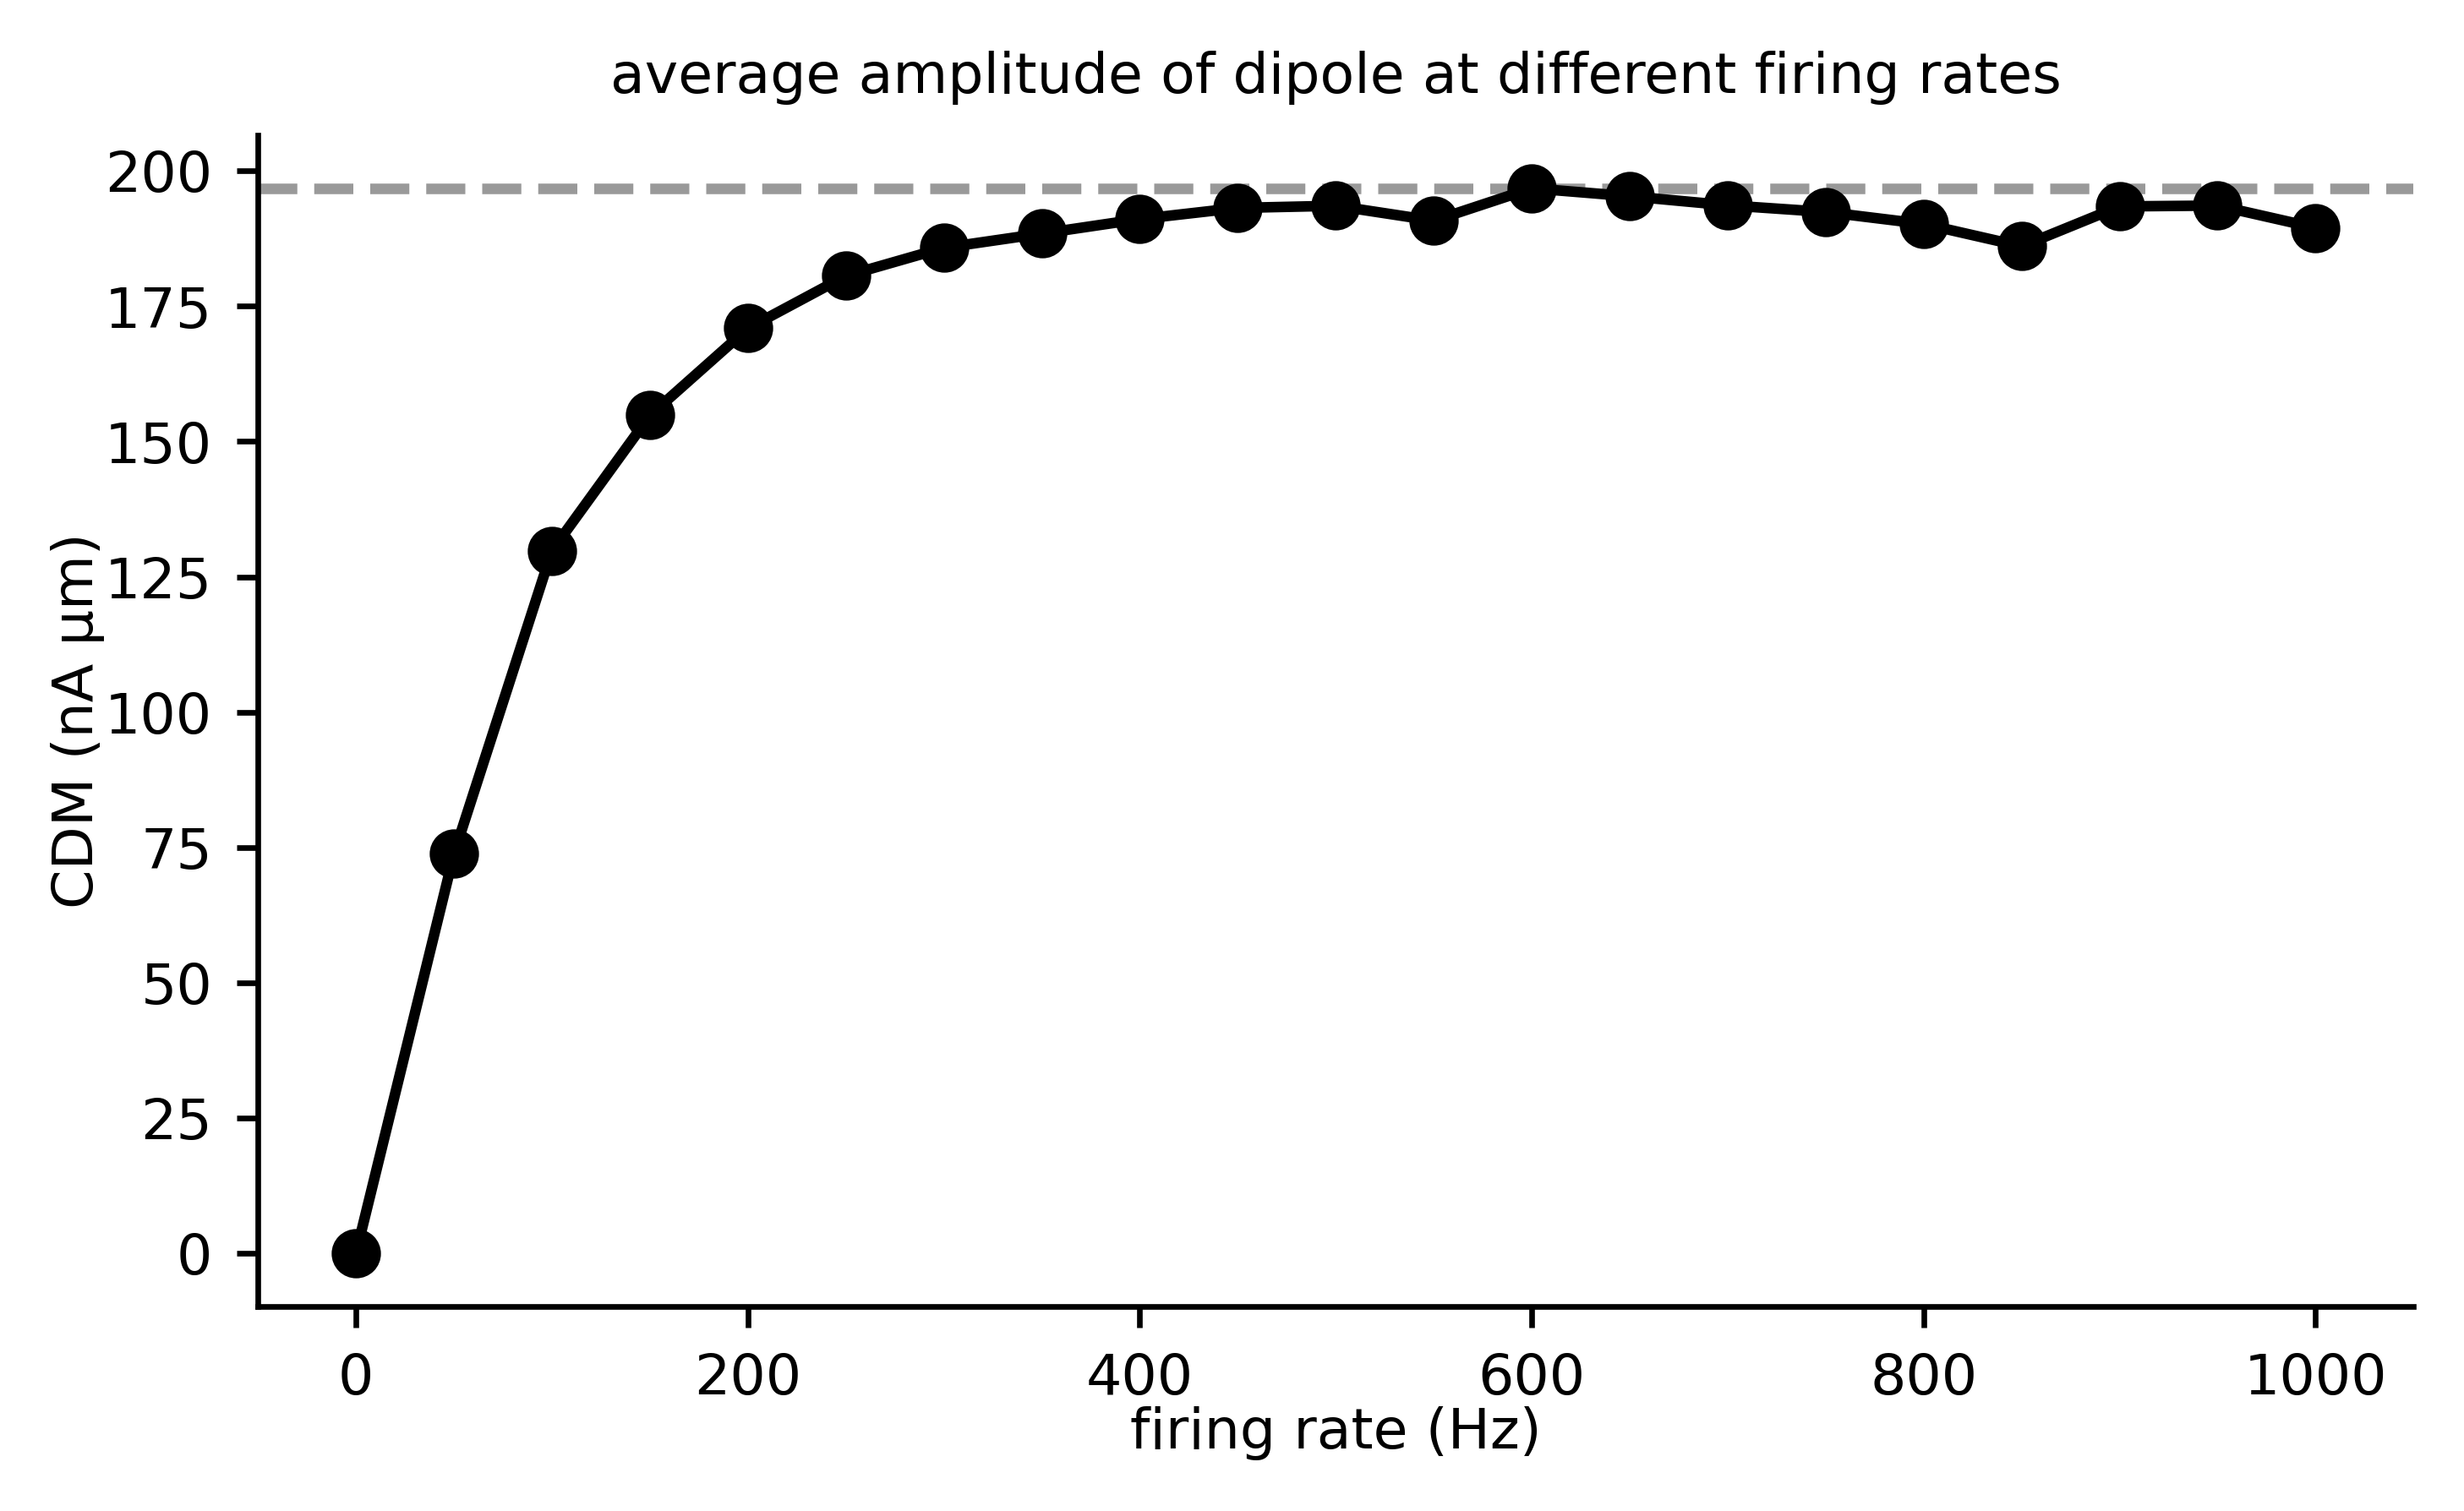

In [5]:
fig = plt.figure(figsize=(5,3))
fig.subplots_adjust(right=0.95)
avg_rate = fig.add_subplot(111)
avg_rate.axhline(np.mean(amp[list(avrg_rate).index(600)]), ls='--', c='gray', alpha=0.8)
avg_rate.plot(avrg_rate, amp, "-o", c='k')
plt.title("average amplitude of dipole at different firing rates")
plt.xlabel('firing rate (Hz)')
plt.ylabel('CDM (nA µm)')
simplify_axes(fig.axes)
plt.savefig('amp_CDM_alternative_model.pdf')